<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/PDE/Ritz-collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ritz-collocation weighted residual method

The one-dimensional heat equation:

$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $

Domain: $( x \in [0, L])$ and $(t \geq 0)$

Boundary conditions: $( u(0, t) = u(L, t) = 0 )$

Initial condition: $( u(x, 0) = \sin(\pi x) )$.


<ipython-input-16-2488bea3657e>:35: LinAlgWarning: Ill-conditioned matrix (rcond=1.64459e-18): result may not be accurate.
  u_new = solve(A, b)


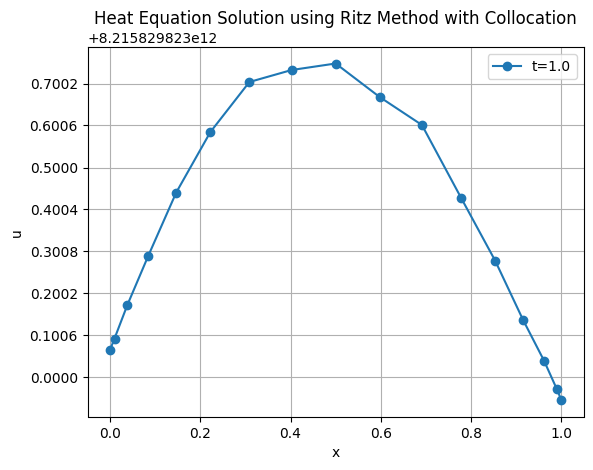

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Define parameters
alpha = 0.01  # thermal diffusivity
L = 1.0       # length of the domain
N = 16        # number of collocation points
dt = 0.01     # time step
t_max = 1.0   # maximum time

# Chebyshev collocation points and differentiation matrix
def chebyshev_collocation(N):
    x = np.cos(np.pi * np.arange(N + 1) / N)
    D = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(N + 1):
            if i != j:
                D[i, j] = (-1)**(i + j) / (x[i] - x[j])
        D[i, i] = -np.sum(D[i, :])
    return D, x

D, x = chebyshev_collocation(N)
x = 0.5 * (x + 1) * L  # scale to [0, L]
D2 = np.dot(D, D)

# Time integration using Ritz method
t = 0.0
while t < t_max:
    u = np.sin(np.pi * x)
    A = alpha * D2
    b = np.zeros(N + 1)
    for i in range(N + 1):
        b[i] = -np.dot(A[:, i], u)
    u_new = solve(A, b)
    u += dt * u_new
    t += dt

# Plot the result
plt.plot(x, u, 'o-', label=f't={t_max}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Heat Equation Solution using Ritz Method with Collocation')
plt.legend()
plt.grid(True)
plt.show()